## Questão 2

Considere o problema de análise de componentes principais (PCA), isto é, determinar
em uma distribuição de dados as componentes que tenham associadas a elas a maior
variância e representar as mesmas no espaço de dados formado pelos autovetores da matriz
de correlação. Neste sentido considere o seguinte problema.
A tabela abaixo apresenta os dados relativos a amostras de solo. Para cada amostra, tem-se
as medidas das porcentagens de areia (X1), sedimentos (X2), argila (X3) e a quantidade de
material orgânico (X4). Da referida tabela obtenha as estatísticas descritivas de cada
variável, isto é, a média, a mediana, o desvio padrão, os valores máximo e mínimo. Sob
estas condições:

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./solo_dataset.csv')
df = df.drop(columns=['Amostra'])
df.head()

,Areia (%):X1,Sedimentos(%):X2,Argila(%):X3,Mat. Orgân(%):X4
0,79.9,13.9,6.2,3.3
1,78.5,16.3,7.2,2.5
2,68.9,22.6,8.5,3.6
3,62.2,20.2,17.6,2.8
4,69.2,23.7,7.1,0.9


#### a)  Obtenha desta tabela a matriz de correlação.

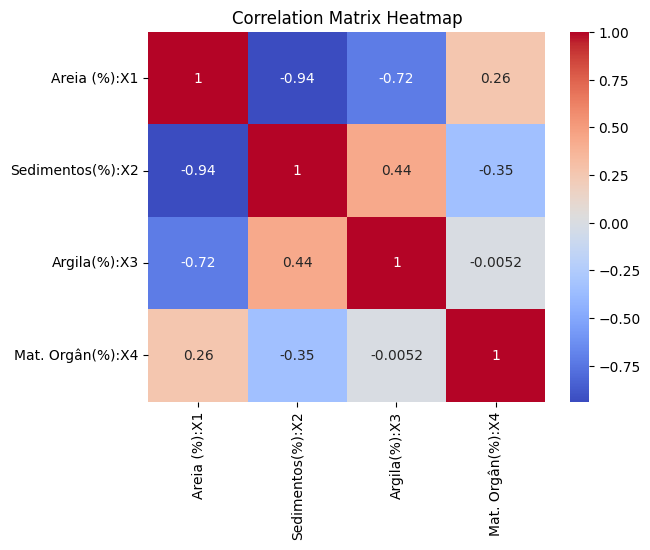

In [9]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### b) Desta matriz determine os autovalores ordenados do máximo ao mínimo e os autovetores correspondentes.

In [10]:
# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# Sort the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Print the sorted eigenvalues and eigenvectors
print("Sorted Eigenvalues:")
print(sorted_eigenvalues)

print("\nSorted Eigenvectors:")
print(sorted_eigenvectors)

Sorted Eigenvalues:
[2.50754359e+00 1.01839506e+00 4.72769384e-01 1.29197263e-03]

Sorted Eigenvectors:
[[ 0.62402814 -0.09377215 -0.17109737 -0.75665141]
 [-0.57858996 -0.12405612  0.55273948 -0.58679026]
 [-0.46528956  0.48036241 -0.68530201 -0.2883032 ]
 [ 0.24357375  0.86317369  0.44222834 -0.00609116]]


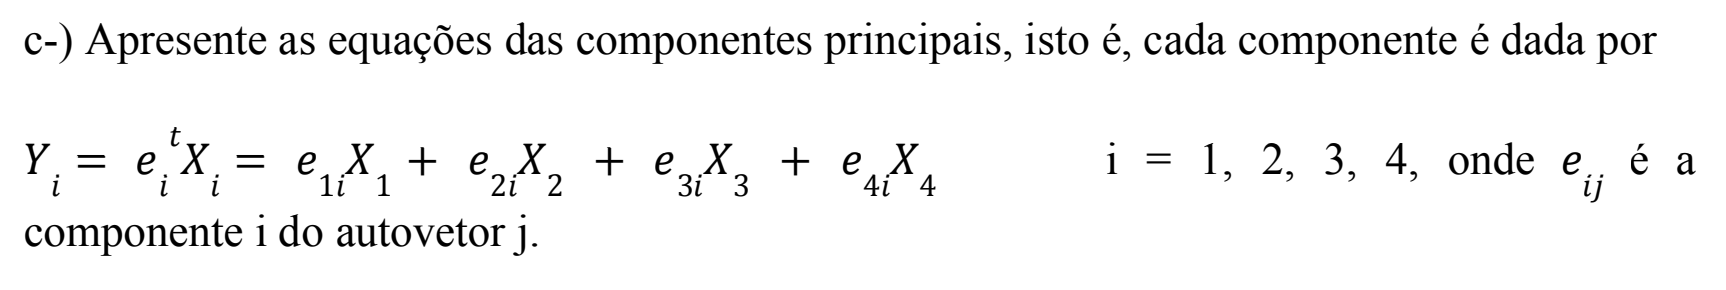

Para resolver a questão e apresentar as equações das componentes principais, precisamos usar os autovetores fornecidos. Cada componente principal \( Y_i \) é dada pela multiplicação dos autovetores pelos dados originais \( X \).

Os autovetores fornecidos são:

\[
\begin{bmatrix}
0.62402814 & -0.09377215 & -0.17109737 & -0.75665141 \\
-0.57858996 & -0.12405612 & 0.55273948 & -0.58679026 \\
-0.46528956 & 0.48036241 & -0.68530201 & -0.2883032 \\
0.24357375 & 0.86317369 & 0.44222834 & -0.00609116 
\end{bmatrix}
\]

Então, para encontrar as componentes principais \( Y_i \), multiplicamos os vetores \( X \) pelos autovetores.

Para \( i = 1 \):

$$
Y_1 = 0.62402814 X_1 - 0.57858996 X_2 - 0.46528956 X_3 + 0.24357375 X_4
$$

Para \( i = 2 \):

$$
Y_2 = -0.09377215 X_1 - 0.12405612 X_2 + 0.48036241 X_3 + 0.86317369 X_4
$$

Para \( i = 3 \):

$$
Y_3 = -0.17109737 X_1 + 0.55273948 X_2 - 0.68530201 X_3 + 0.44222834 X_4
$$

Para \( i = 4 \):

$$
Y_4 = -0.75665141 X_1 - 0.58679026 X_2 - 0.2883032 X_3 - 0.00609116 X_4
$$

Estas são as equações das componentes principais \( Y_i \) para \( i = 1, 2, 3, 4 \), usando os autovetores fornecidos.



#### d)  Determine os componentes principais de forma que a soma das variâncias destes componentes correspondam 95% ou mais da variância total.

Para determinar os componentes principais de forma que a soma das variâncias destes componentes corresponda a 95% ou mais da variância total, precisamos utilizar os autovalores. Os autovalores representam a variância explicada por cada componente principal.

Primeiro, vamos calcular a variância total, que é a soma dos autovalores:


$$
\lambda_{\text{total}} = 2.50754359 + 1.01839506 + 0.472769384 + 0.00129197263
$$




Calculando isso:

$$
\lambda_{\text{total}} = 4.00000000663 \approx 4
$$

Agora, vamos calcular a proporção da variância explicada por cada componente principal e determinar quantos componentes principais precisamos para atingir 95% da variância total.

Os autovalores fornecidos são:

$$
\lambda_1 = 2.50754359, \quad \lambda_2 = 1.01839506, \quad \lambda_3 = 0.472769384, \quad \lambda_4 = 0.00129197263
$$

Vamos calcular as proporções de variância explicada por cada autovalor:

$$
\text{Proporção} \lambda_1 = \frac{2.50754359}{4} = 0.6268858975
$$

$$
\text{Proporção} \lambda_2 = \frac{1.01839506}{4} = 0.254598765
$$

$$
\text{Proporção} \lambda_3 = \frac{0.472769384}{4} = 0.118192346
$$

$$
\text{Proporção} \lambda_4 = \frac{0.00129197263}{4} = 0.0003229931575
$$

Agora, vamos somar as proporções para determinar quantas componentes principais precisamos:

$$
\text{Proporção acumulada para } \lambda_1 = 0.6268858975
$$

$$
\text{Proporção acumulada para } \lambda_1 + \lambda_2 = 0.6268858975 + 0.254598765 = 0.8814846625
$$

$$
\text{Proporção acumulada para } \lambda_1 + \lambda_2 + \lambda_3 = 0.8814846625 + 0.118192346 = 0.9996770085
$$

$$
\text{Proporção acumulada para } \lambda_1 + \lambda_2 + \lambda_3 + \lambda_4 = 0.9996770085 + 0.0003229931575 = 1
$$


Para atingir 95% da variância total, precisamos das três primeiras componentes principais, pois a soma das variâncias explicadas por elas é 99.96770085%, que é maior do que 95%.

Portanto, as componentes principais necessárias são as correspondentes aos três primeiros autovalores e seus respectivos autovetores:

1. Componente principal 1 (\( Y_1 \)):

$$
Y_1 = 0.62402814 X_1 - 0.57858996 X_2 - 0.46528956 X_3 + 0.24357375 X_4
$$

2. Componente principal 2 (\( Y_2 \)):

$$
Y_2 = -0.09377215 X_1 - 0.12405612 X_2 + 0.48036241 X_3 + 0.86317369 X_4
$$

3. Componente principal 3 (\( Y_3 \)):

$$
Y_3 = -0.17109737 X_1 + 0.55273948 X_2 - 0.68530201 X_3 + 0.44222834 X_4
$$

Esses três componentes principais explicam mais de 95% da variância total dos dados.